Group 2 - Python Notebook

In [ ]:
from Dataset import Preprocessing
from Model.mnb import MultinomialNaiveBayes
from Utils.utils import *

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DEBUG = True

Import data

In [ ]:

data_processing = Preprocessing()
reviews_df, wines_df, users_df, full_df = data_processing.get_dataset()

In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350501 entries, 1319626 to 606368
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Wine         1350501 non-null  object 
 1   Year         1316892 non-null  object 
 2   Wine ID      1350501 non-null  int64  
 3   User Rating  1350501 non-null  float64
 4   Note         1350491 non-null  object 
 5   CreatedAt    1350501 non-null  object 
 6   User         1350491 non-null  object 
 7   Winery       1350501 non-null  object 
 8   Rating       1350501 non-null  float64
 9   Country      1350501 non-null  object 
 10  Region       1349489 non-null  object 
 11  Price        1350501 non-null  float64
 12  Cleaned      1350501 non-null  object 
 13  Tokenized    1350501 non-null  object 
 14  Sentiment    1350501 non-null  int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 164.9+ MB


In [4]:
reviews_df.info(), wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630246 entries, 0 to 1630245
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Wine         1630246 non-null  object 
 1   Year         1589277 non-null  object 
 2   Wine ID      1630246 non-null  int64  
 3   User Rating  1630246 non-null  float64
 4   Note         1630236 non-null  object 
 5   CreatedAt    1630246 non-null  object 
 6   User         1630236 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 87.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Winery      1798 non-null   object 
 1   Year        1794 non-null   object 
 2   Wine ID     1798 non-null   int64  
 3   Wine        1798 non-null   object 
 4   Rating      1798 non-null   float64
 5   num_review  1798 non-null   int

(None, None)

In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49297 entries, 0 to 49296
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User         49297 non-null  object
 1   Bio          8886 non-null   object
 2   UserCountry  49297 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


Data Visualization

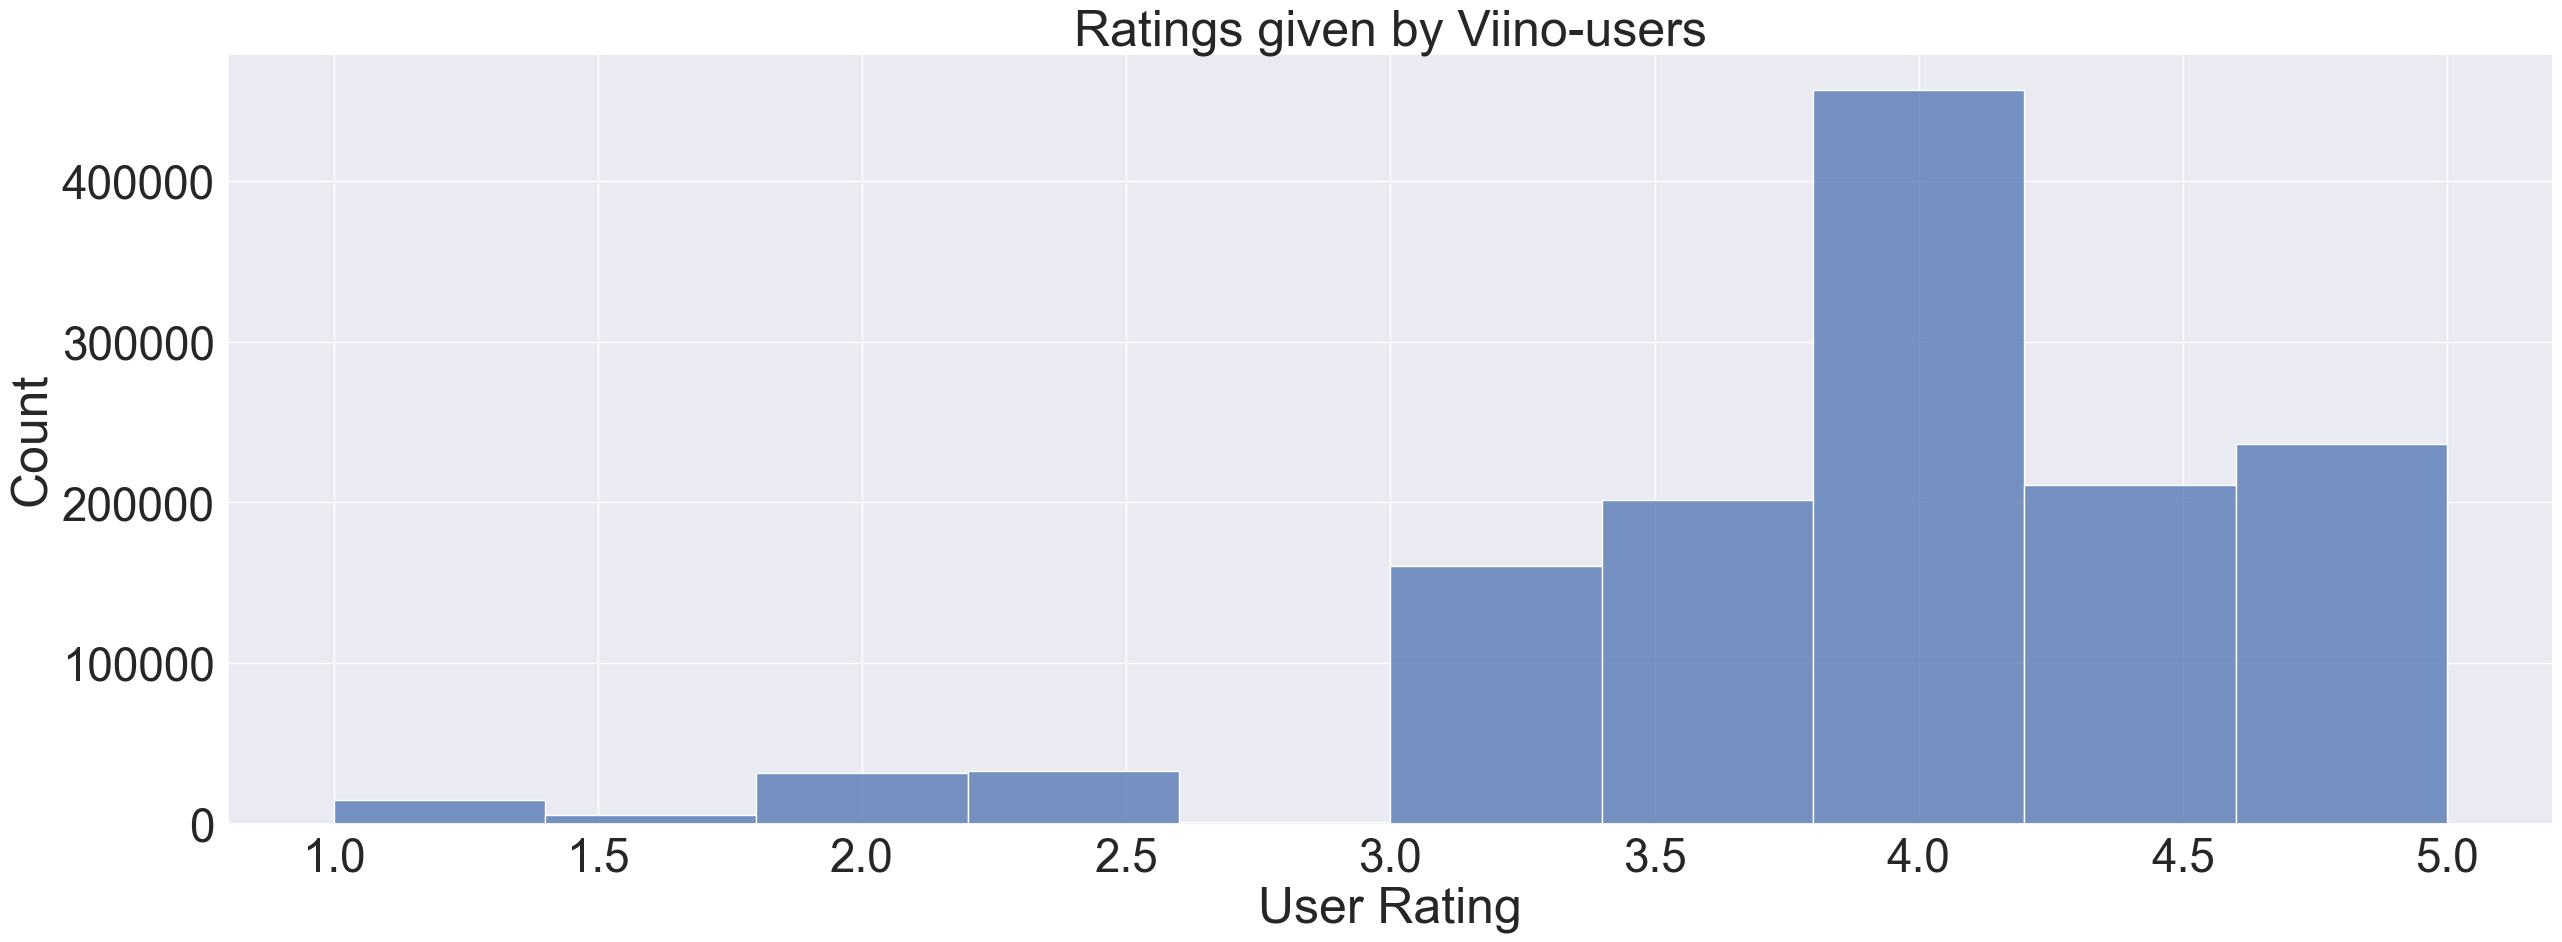

In [38]:
sns.histplot(full_df["User Rating"], bins=10, kde=False).set(title='Ratings given by Vivino-users')
sns.set(rc={'figure.figsize':(100,5)})

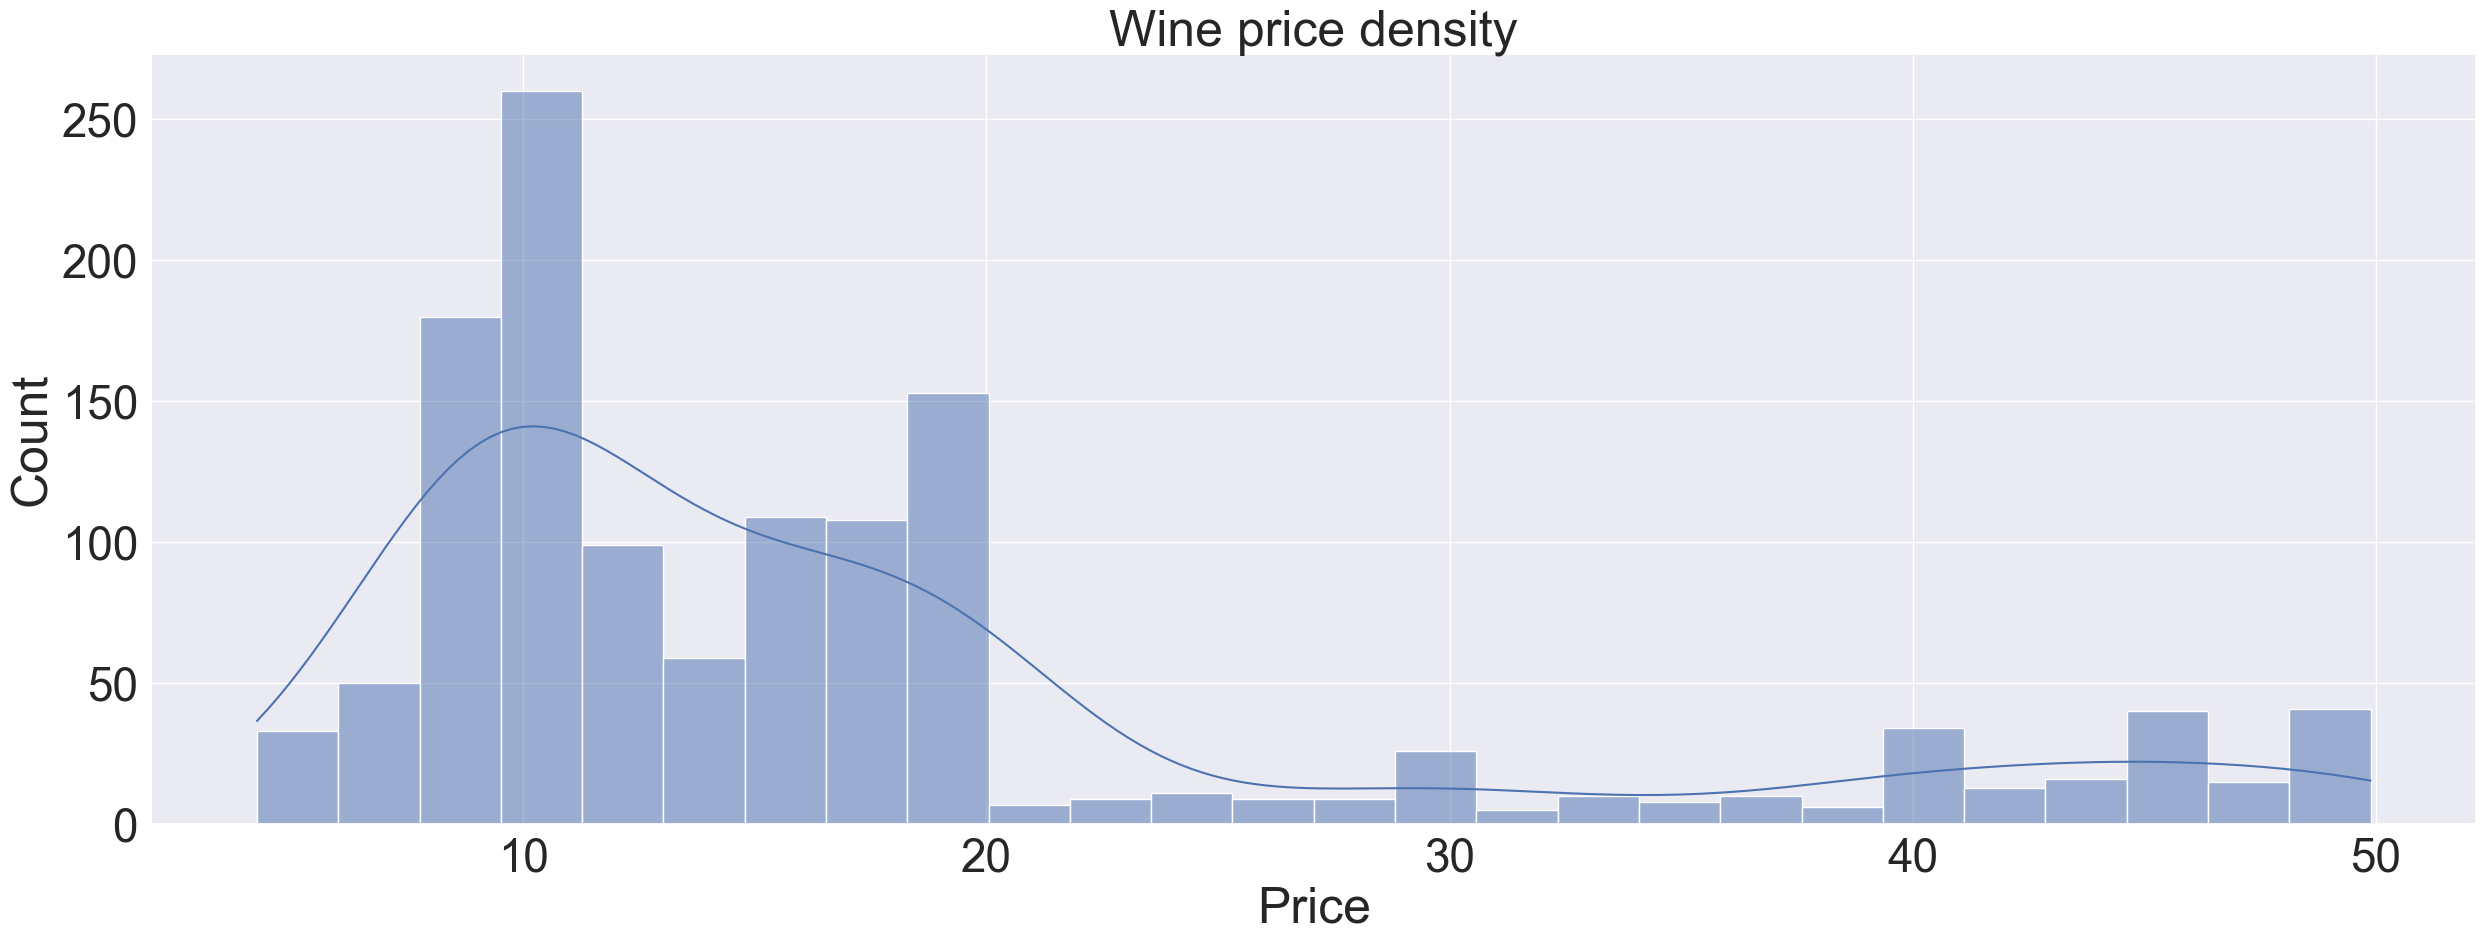

In [45]:
df = wines_df[wines_df.Price<50].sort_values('Price')
bins =  np.arange(0, 50.0, 2)
#plt.hist(df['Price'], bins)
sns.histplot(data=df['Price'], kde=True).set(title='Wine price density')
sns.set(rc={'figure.figsize':(20,20)})

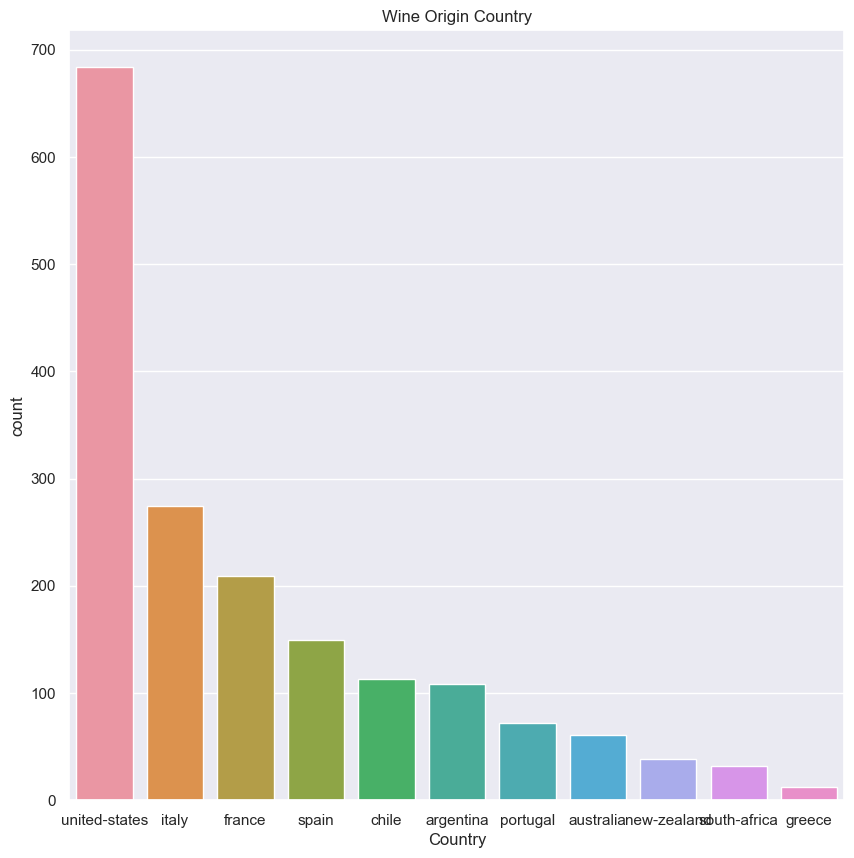

In [40]:
sns.countplot(x = wines_df["Country"], order = wines_df["Country"].value_counts().iloc[:11].index).set(title='Wine Origin Country')
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)

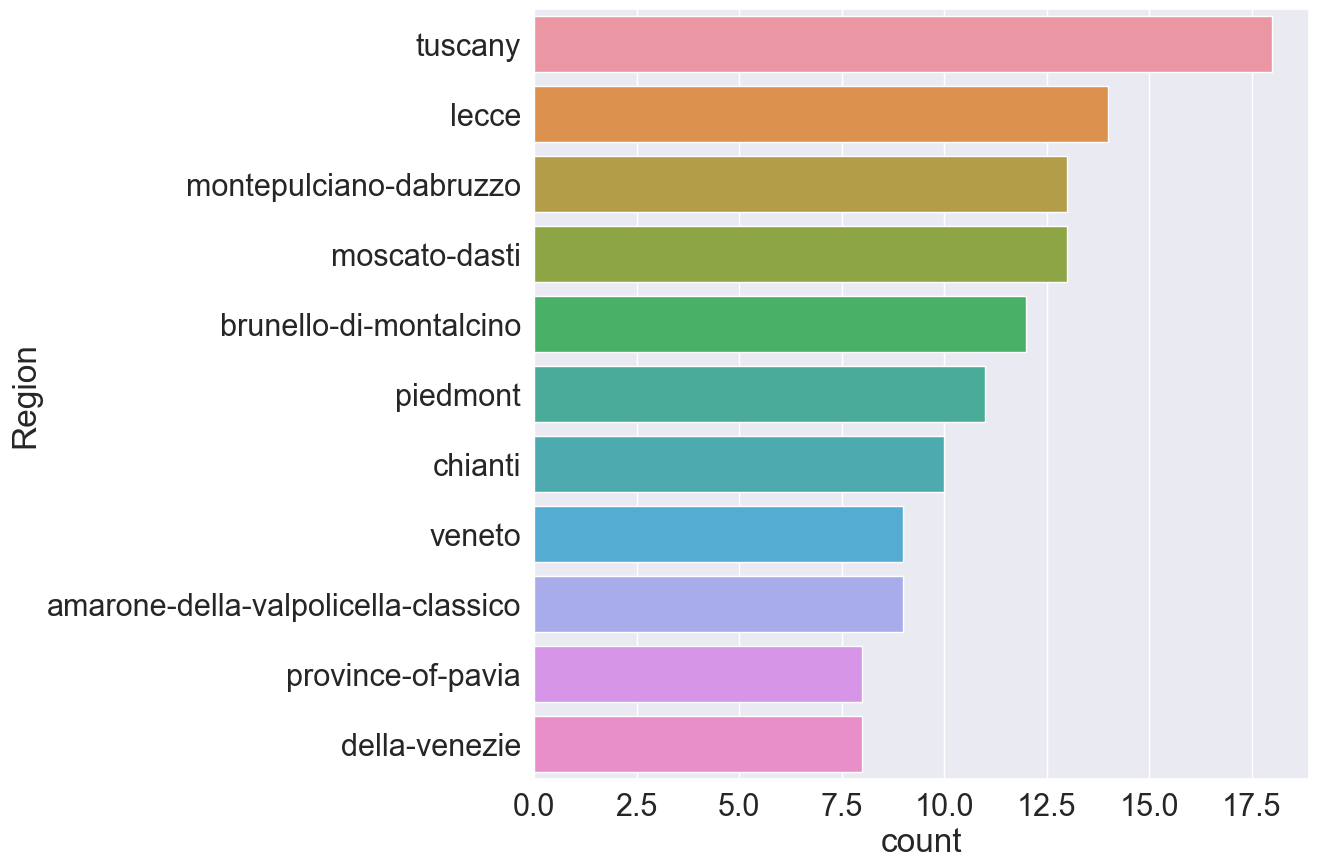

In [41]:
sns.countplot(y = wines_df[wines_df['Country']=='italy']["Region"], order = wines_df[wines_df['Country']=='italy']["Region"].value_counts().iloc[:11].index)
sns.set(rc={'figure.figsize':(30, 10)}, font_scale = 2)

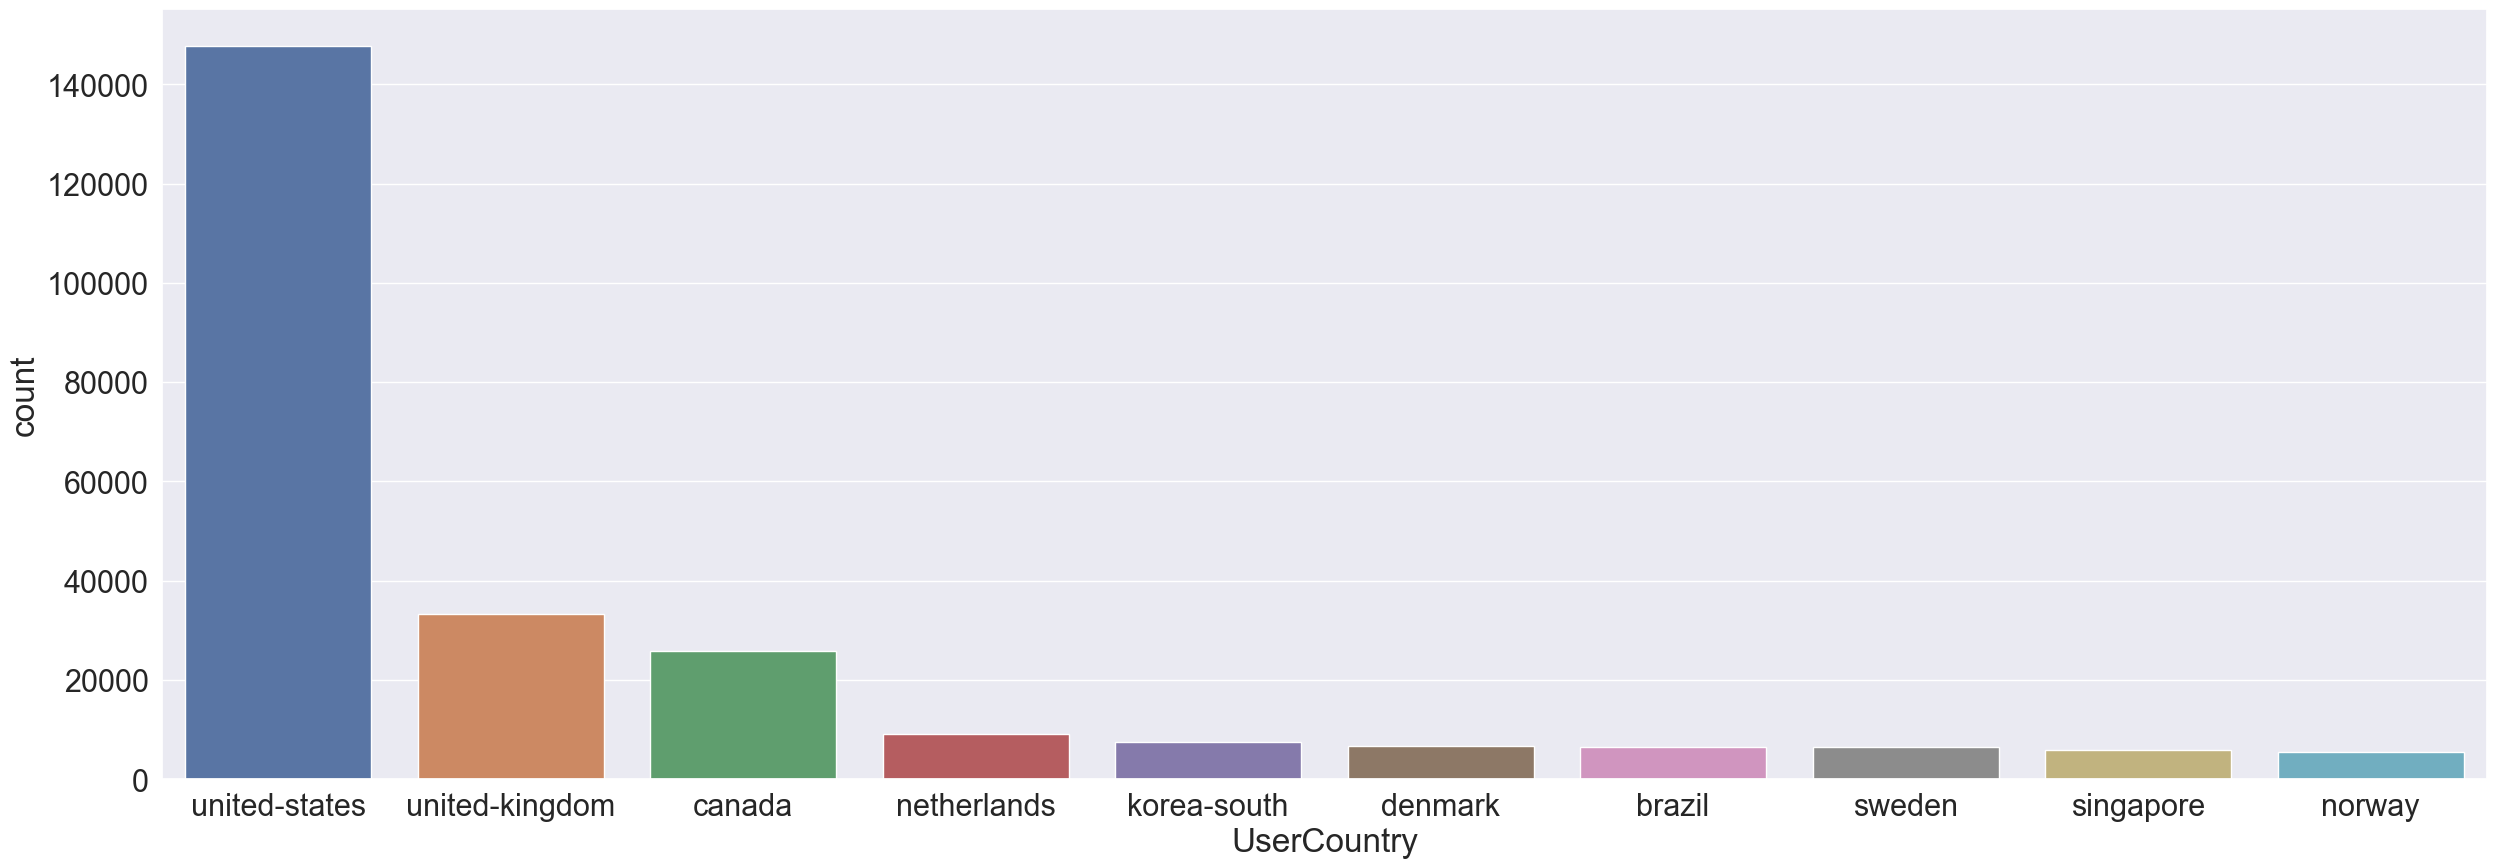

In [42]:
df_users = full_df.merge(users_df,on="User",how='outer')
df_users = df_users[df_users['UserCountry'].notna()]
sns.countplot(x = df_users["UserCountry"], order = df_users["UserCountry"].value_counts().iloc[:10].index)
sns.set(rc={'figure.figsize':(30, 15)}, font_scale = 2)

<AxesSubplot: xlabel='Price', ylabel='count'>

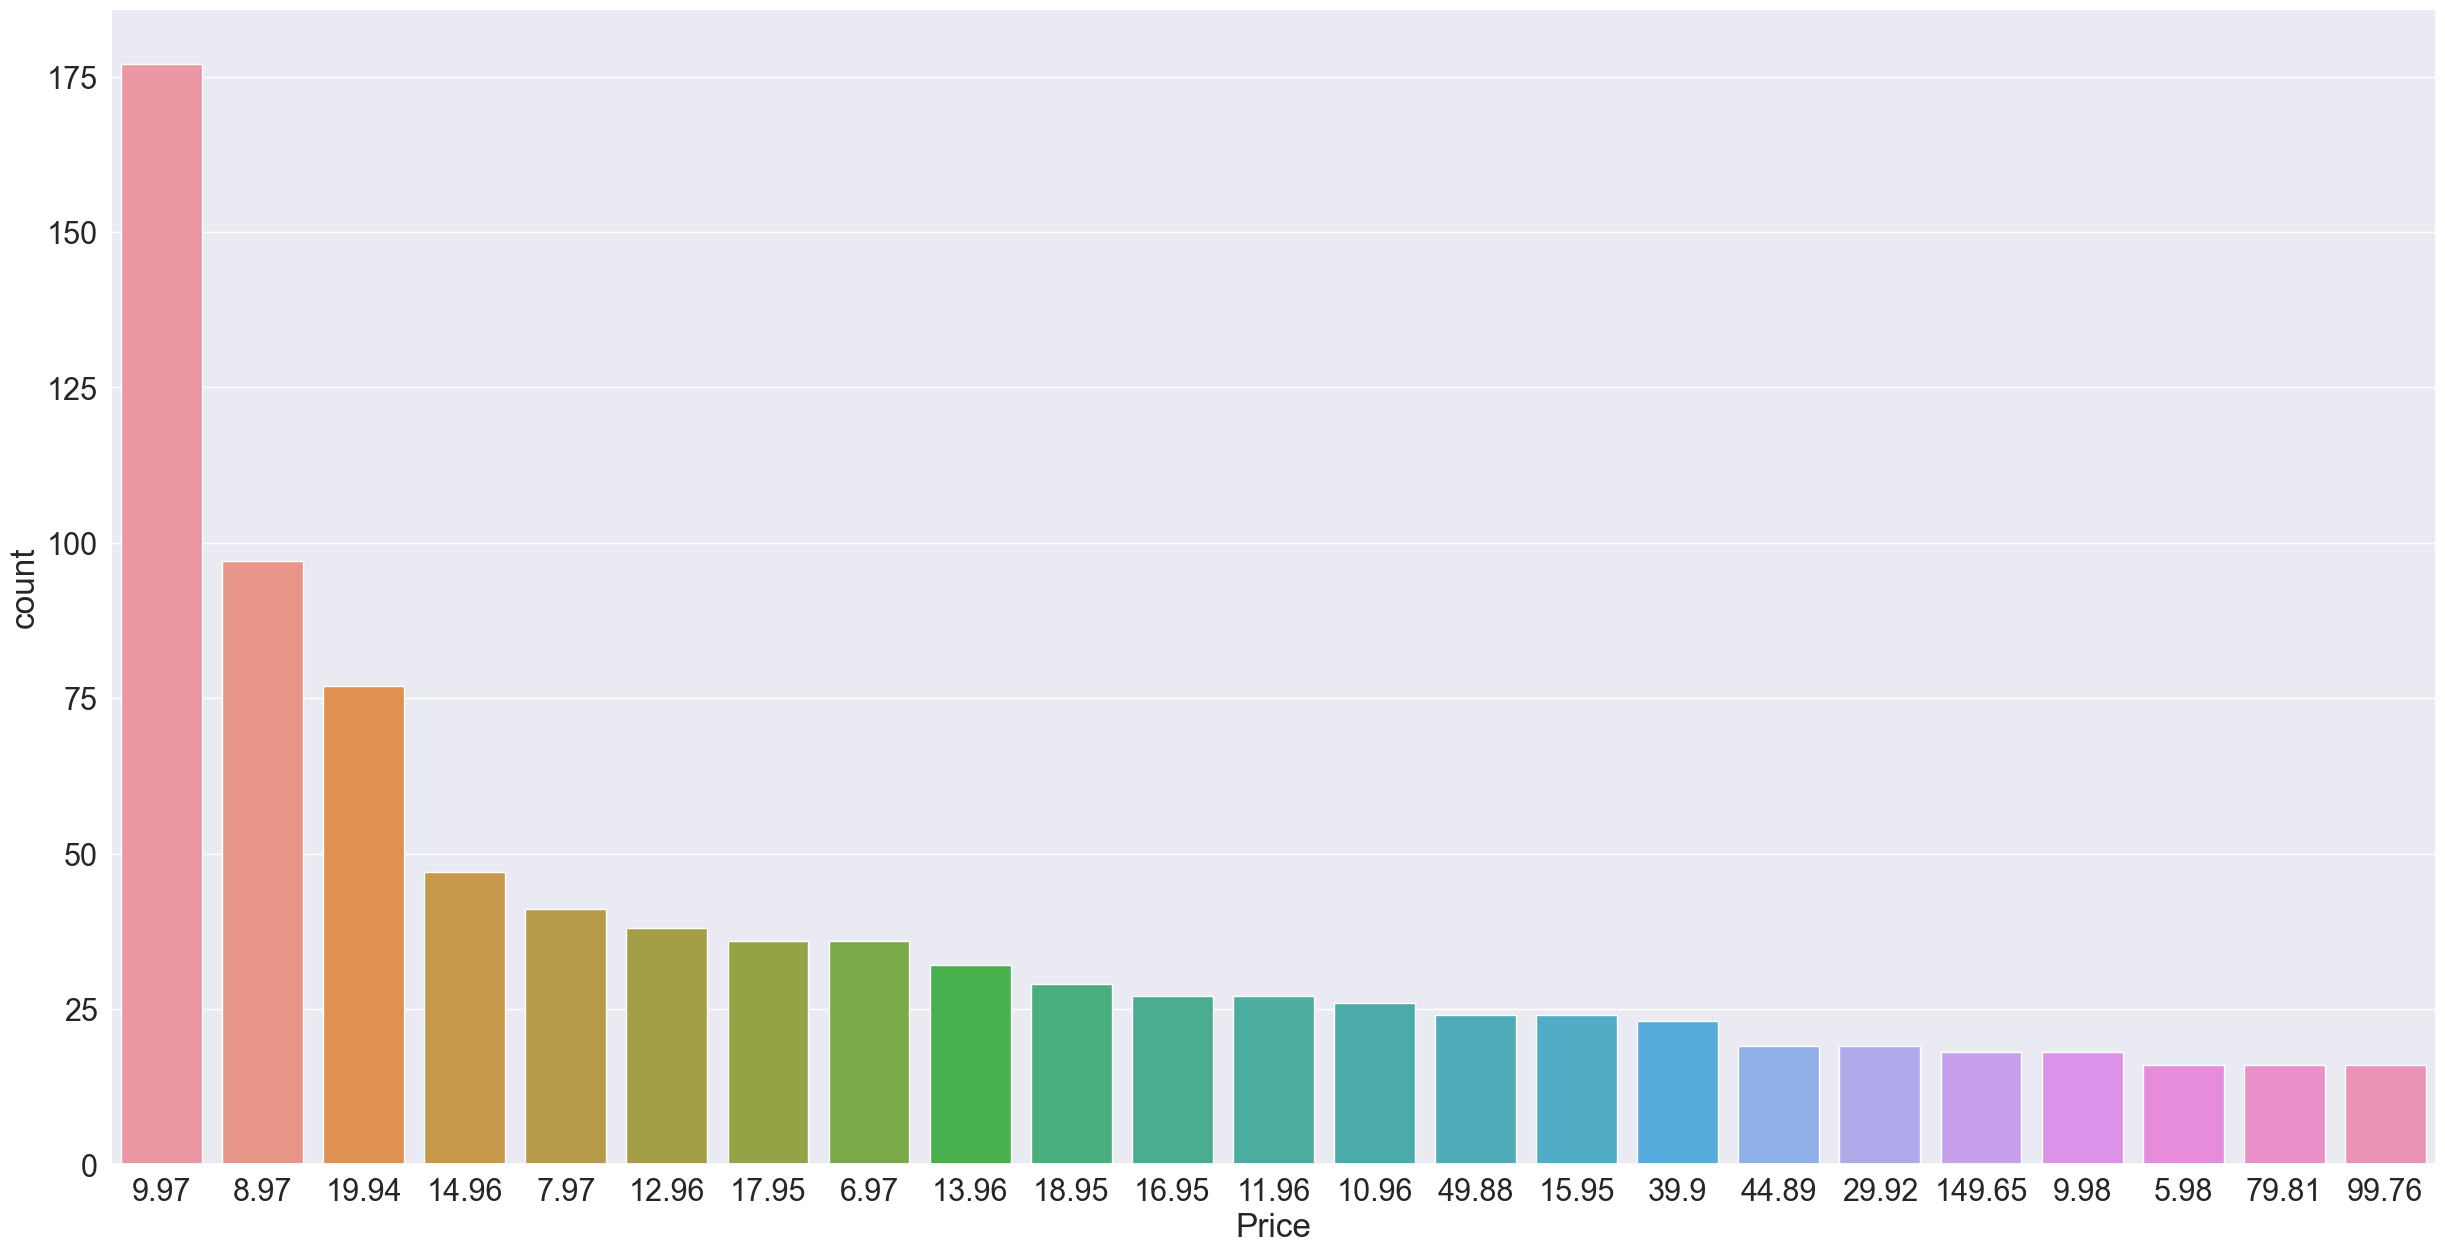

In [43]:
df_price = round(wines_df["Price"],2)
sns.countplot(x = df_price, order = df_price.value_counts().iloc[:23].index)

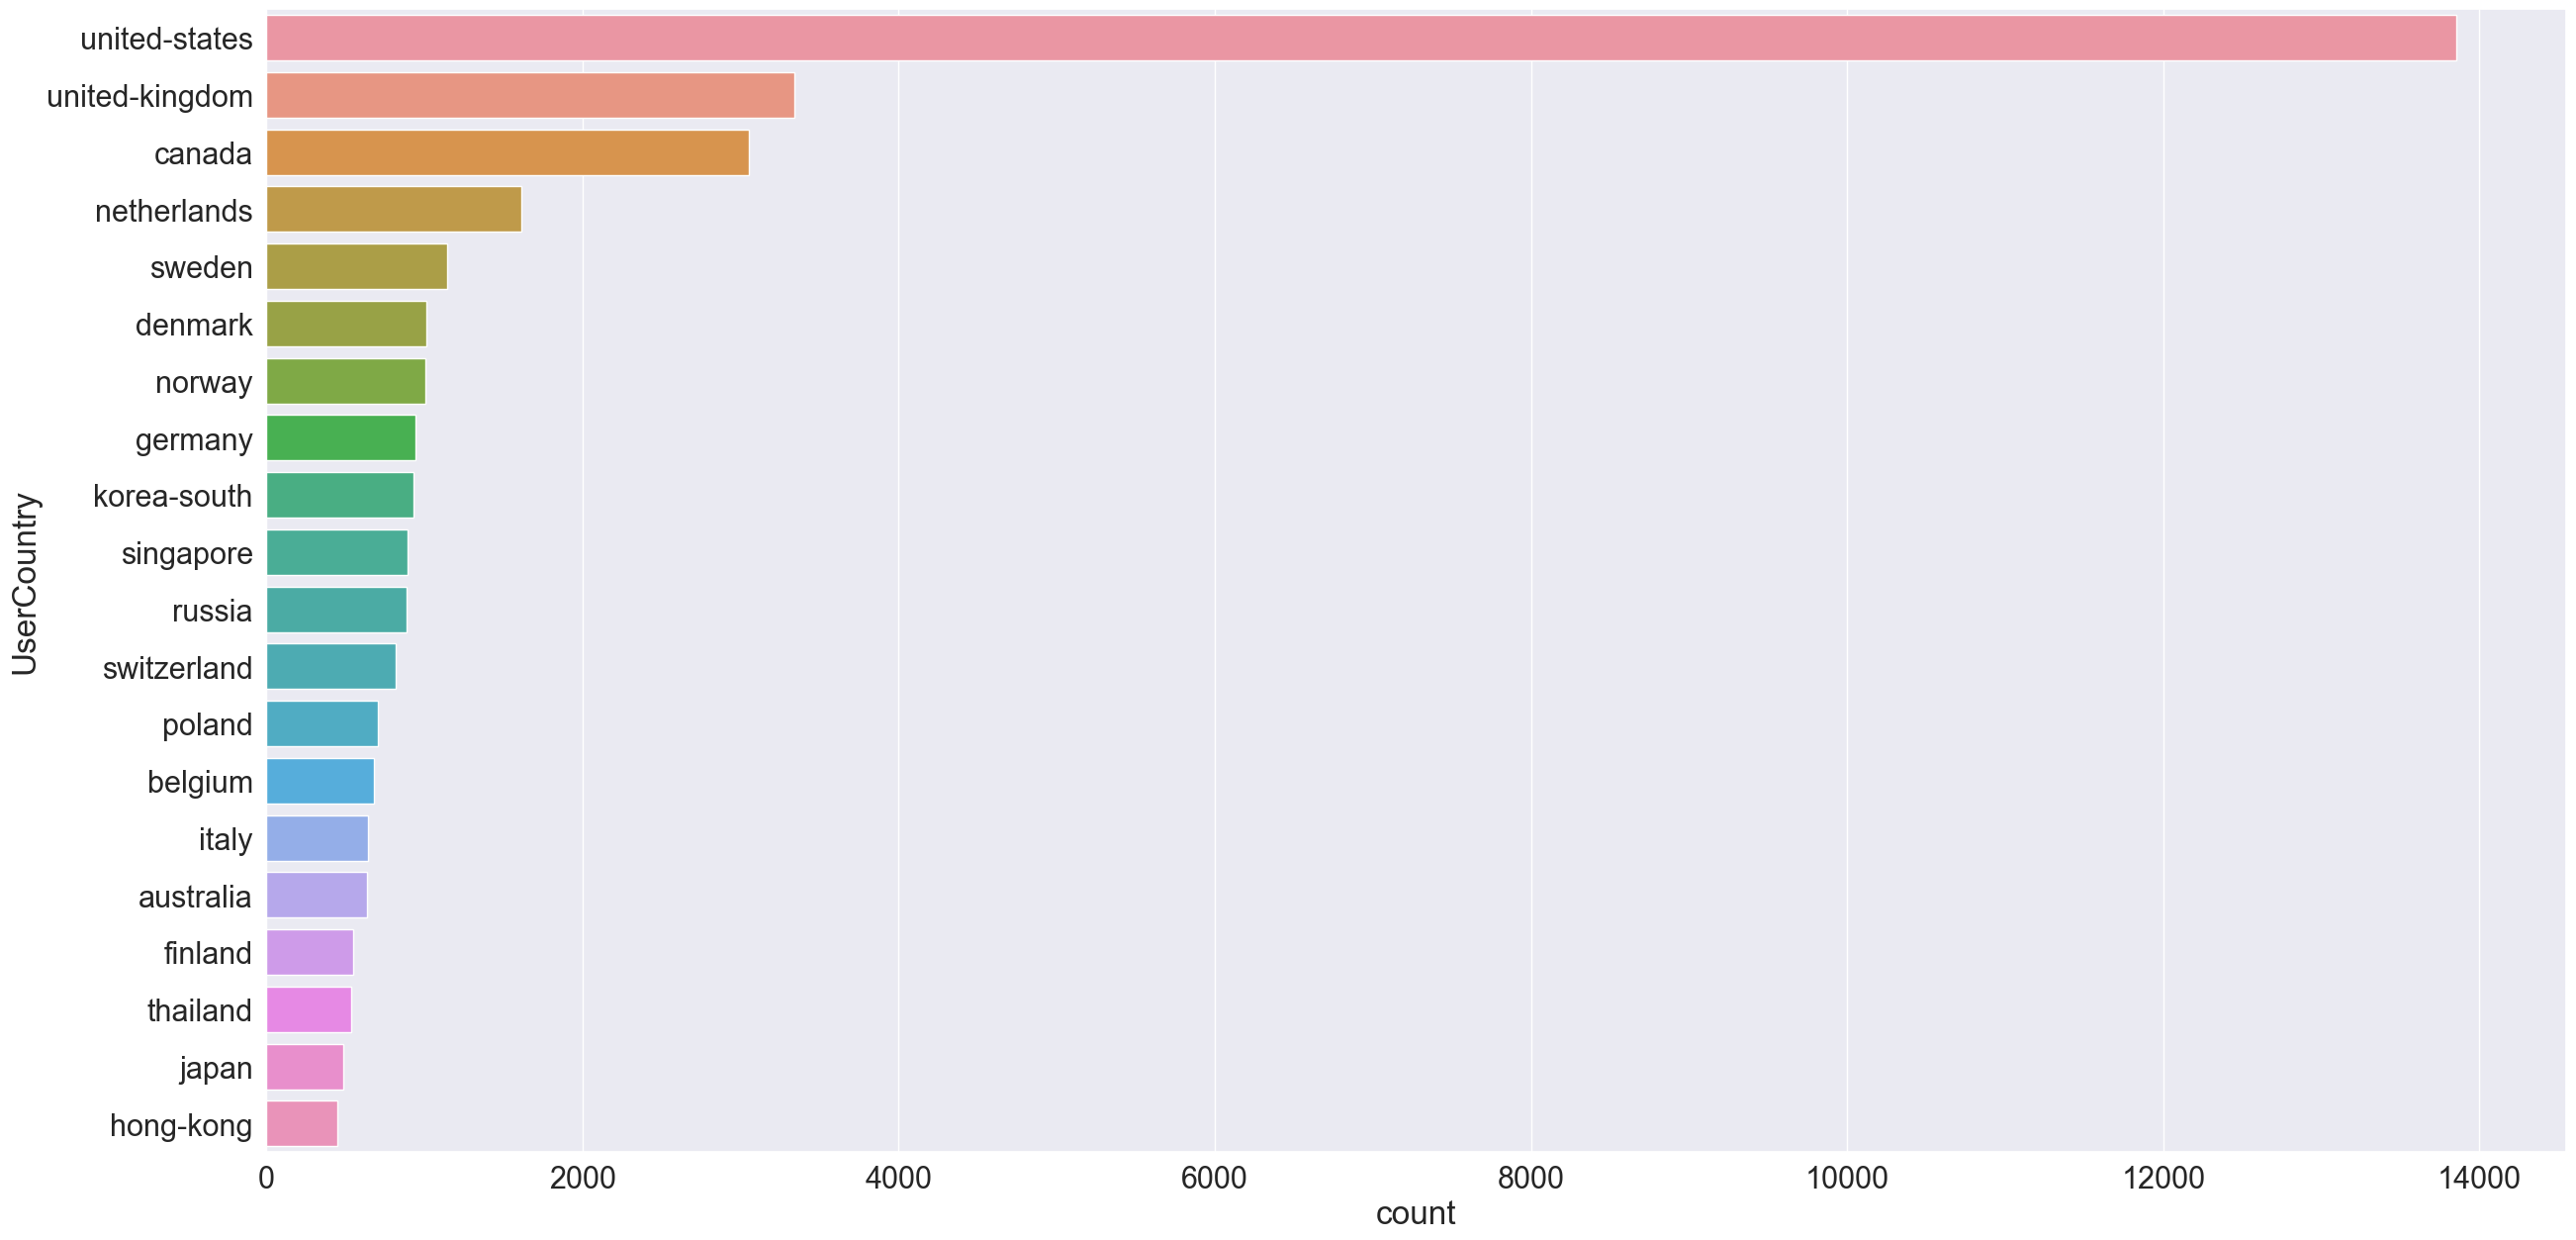

In [44]:
sns.countplot(y = df_users[df_users['Country']=='italy']['UserCountry'], order = df_users[df_users['Country']=='italy']['UserCountry'].value_counts().iloc[:20].index)
sns.set(rc={'figure.figsize':(30, 10)}, font_scale = 3)




Rating distribution - Sentiment

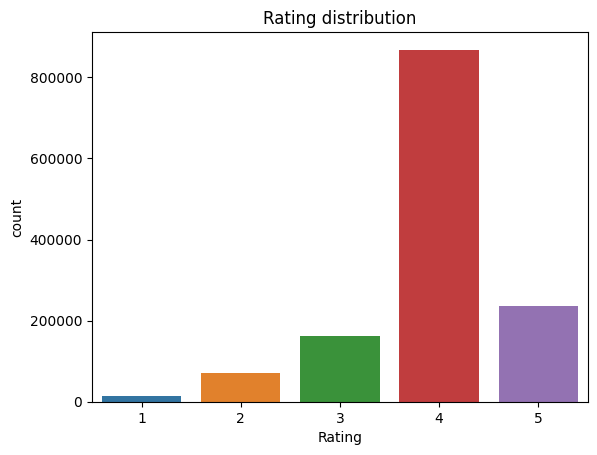

In [6]:
full_df["int_Rating"] = full_df["User Rating"].apply(round)

f = sns.countplot(x='int_Rating', data=full_df)
f.set_title("Rating distribution")
plt.xlabel("Rating");

In [7]:
neg = full_df[full_df["User Rating"]<4].Wine.count()
pos = full_df[full_df["User Rating"]>4].Wine.count()
neutr = pos = full_df[full_df["User Rating"]==4].Wine.count()

neg, neutr,pos

(450167, 450167, 450167)

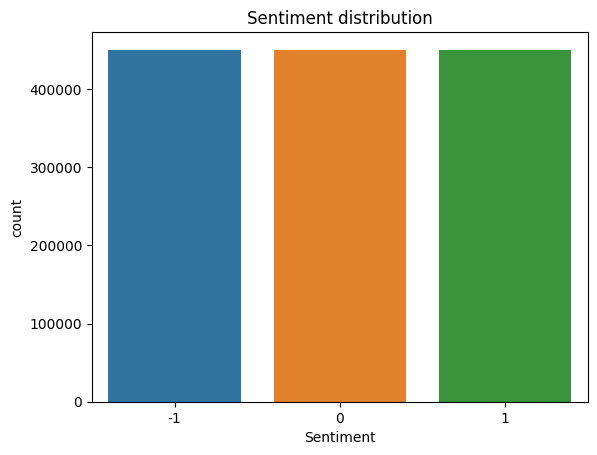

In [8]:

f = sns.countplot(x='Sentiment', data=full_df)
f.set_title("Sentiment distribution")
plt.xlabel("Sentiment");


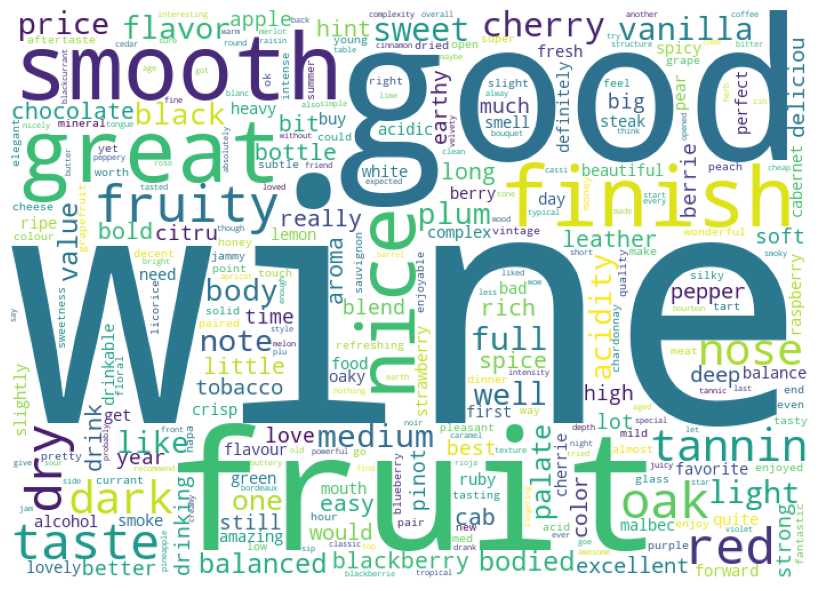

In [9]:
plot_wordcloud(full_df["Cleaned"])

In [10]:
from sklearn.model_selection import train_test_split

X, y  = full_df, full_df['Sentiment']
_X_train, _X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)
X_train = _X_train['Tokenized']
X_test = _X_test['Tokenized']



In [11]:
MNB = MultinomialNaiveBayes(
    classes=np.unique(np.array([-1,0,1]))
).fit(X_train.values, y_train.values)

In [12]:
y_hat = MNB.predict(X_test.values)

In [13]:
acc = np.sum(np.equal(y_test.values, y_hat)) / len(y_test)
acc

0.5605465616523222

In [14]:
class_report(y_test,y_hat)

              precision    recall  f1-score   support

          -1       0.62      0.64      0.63    135050
           0       0.46      0.37      0.41    135050
           1       0.58      0.67      0.62    135051

    accuracy                           0.56    405151
   macro avg       0.55      0.56      0.55    405151
weighted avg       0.55      0.56      0.55    405151



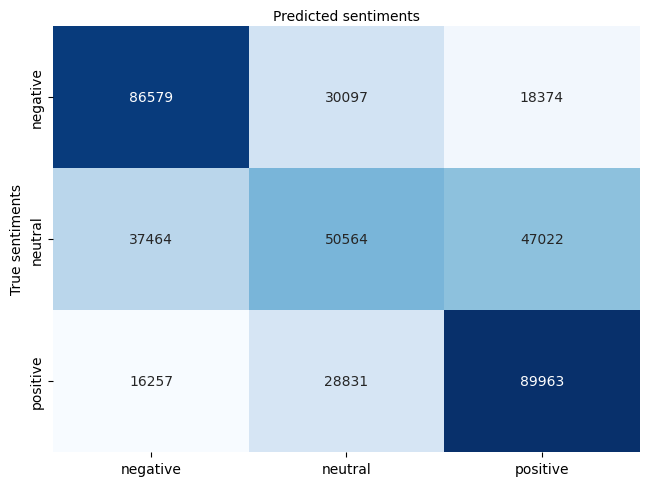

In [15]:
cnf_matrix(y_test,y_hat)


In [16]:
#does not make sense
#plot_sentiment_pred(y_hat,y_test)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(full_df['Tokenized'].astype("U"))

In [18]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [19]:
full_df['cluster'] = model.labels_

In [20]:
clusters = full_df.groupby('cluster')

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :15]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 smooth
 fruity
 finish
 nice
 great
 dry
 wine
 easy
 delicious
 taste
 good
 bold
 bodied
 sweet
 flavor
------------
Cluster 1:
 oak
 cherry
 fruit
 dark
 vanilla
 blackberry
 plum
 black
 medium
 chocolate
 finish
 red
 tannins
 nose
 leather
------------
Cluster 2:
 wine
 great
 fruity
 sweet
 nice
 dry
 taste
 price
 like
 drink
 easy
 finish
 best
 little
 fruit
------------
Cluster 3:
 light
 fruity
 smooth
 easy
 nice
 dry
 sweet
 good
 crisp
 wine
 refreshing
 taste
 finish
 body
 drink
------------
Cluster 4:
 good
 value
 wine
 price
 fruity
 dry
 taste
 great
 sweet
 really
 nice
 money
 body
 flavor
 pretty
------------


C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
Y = vectorizer.transform(["my wine was very good, drink with friend"])
prediction = model.predict(Y)
print(prediction)

[4]


In [22]:
full_df[full_df.cluster==0].groupby(by="Sentiment").count()

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,cluster
Sentiment,,,,,,,,,,,,,,,,
-1,17937,17426,17937,17937,17937,17937,17937,17937,17937,17937,17921,17937,17937,17937,17937,17937
0,41487,39760,41487,41487,41487,41487,41487,41487,41487,41487,41468,41487,41487,41487,41487,41487
1,50556,48656,50556,50556,50556,50556,50556,50556,50556,50556,50546,50556,50556,50556,50556,50556


In [23]:
full_df[full_df.cluster==1].groupby(by="Sentiment").count()


,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,cluster
Sentiment,,,,,,,,,,,,,,,,
-1,65622,64550,65622,65622,65622,65622,65622,65622,65622,65622,65587,65622,65622,65622,65622,65622
0,80525,79060,80525,80525,80525,80525,80525,80525,80525,80525,80515,80525,80525,80525,80525,80525
1,82479,81615,82479,82479,82479,82479,82479,82479,82479,82479,82471,82479,82479,82479,82479,82479


In [24]:
full_df[full_df.cluster==2].groupby(by="Sentiment").count()

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,cluster
Sentiment,,,,,,,,,,,,,,,,
-1,293805,287092,293805,293805,293796,293805,293796,293805,293805,293805,293347,293805,293805,293805,293805,293805
0,260795,253588,260795,260795,260794,260795,260794,260795,260795,260795,260613,260795,260795,260795,260795,260795
1,281452,274549,281452,281452,281452,281452,281452,281452,281452,281452,281340,281452,281452,281452,281452,281452


In [25]:
full_df[full_df.cluster==3].groupby(by="Sentiment").count()

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,cluster
Sentiment,,,,,,,,,,,,,,,,
-1,25069,24529,25069,25069,25069,25069,25069,25069,25069,25069,25027,25069,25069,25069,25069,25069
0,20797,19860,20797,20797,20797,20797,20797,20797,20797,20797,20781,20797,20797,20797,20797,20797
1,12708,12036,12708,12708,12708,12708,12708,12708,12708,12708,12692,12708,12708,12708,12708,12708


In [26]:
full_df[full_df.cluster==4].groupby(by="Sentiment").count()


,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,cluster
Sentiment,,,,,,,,,,,,,,,,
-1,47734,46845,47734,47734,47734,47734,47734,47734,47734,47734,47686,47734,47734,47734,47734,47734
0,46563,45144,46563,46563,46563,46563,46563,46563,46563,46563,46531,46563,46563,46563,46563,46563
1,22972,22182,22972,22972,22972,22972,22972,22972,22972,22972,22964,22972,22972,22972,22972,22972


In [103]:
#change name
X_test_it = _X_test[_X_test.Country == 'italy']
#y_test_it = _X_test[_X_test.Country == 'italy'].Sentiment

In [110]:
X_test_it['PriceNote'] = X_test_it.Note.apply(lambda f: data_processing.pick_only_key_sentence(f,'price'))
X_test_it = X_test_it[X_test_it.astype(str)['PriceNote'] != '[]']

C:\Users\andre\AppData\Local\Temp\ipykernel_15304\1004275446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_it['PriceNote'] = X_test_it.Note.apply(lambda f: data_processing.pick_only_key_sentence(f,'price'))


In [111]:
X_test_it['PriceNote'] = X_test_it.Note.apply(lambda f: data_processing.clean(f))
X_test_it['PriceNote'] = X_test_it.Note.apply(lambda f: data_processing.tokenize(f))

C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py:42: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 42 of the file C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  no_html = BeautifulSoup(text).get_text()
C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\andre\AppData\Local\Temp\ipykernel_15304\3711254812.py:1: SettingWithCopyWarnin

In [112]:
X_test_it

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,Sentiment,int_Rating,PriceNote
321481,Montepulciano d'Abruzzo 2019,2019,93061,4.0,"Good value for the price. A well balance, not ...",2019-01-31T00:06:50.000Z,brandon.prosser,Masciarelli,3.8,italy,montepulciano-dabruzzo,9.967263,good value for the price a well balance not ov...,"[good, value, price, well, balance, overly, fr...",0,4,"[Good, value, price, A, well, balance, overly,..."
947967,Amarone della Valpolicella Classico 2018,2018,91908,5.0,"Bold, Complex, for the price.",2021-05-18T23:29:40.000Z,m9556de4cfb32f04fbac82d104748146,La Giaretta,4.5,italy,amarone-della-valpolicella-classico,38.901259,bold complex for the price,"[bold, complex, price, ]",1,5,"[Bold, Complex, price, ]"
148924,Collection Pinot Noir 2017,2017,1135821,3.5,Nice flavor for the price!,2014-02-06T02:10:55.000Z,jon-lod,Cavit,3.3,italy,province-of-pavia,17.949055,nice flavor for the price,"[nice, flavor, price, ]",-1,4,"[Nice, flavor, price, ]"
920033,60 Sessantanni Old Vines Primitivo di Manduria...,2017,11890,4.0,"Vanilla, chocolate and black fruit….divine and...",2022-04-10T05:24:33.000Z,m430f93829b945eef4d187d360d93f86,San Marzano,4.5,italy,primitivo-di-manduria,32.416053,vanilla chocolate and black fruit divine and a...,"[vanilla, chocolate, black, fruit, divine, gre...",0,4,"[Vanilla, chocolate, black, fruit, divine, gre..."
692535,Palazzo della Torre 2017,2017,8184,4.0,Black fruit on the nose. Strong taste of ciga...,2020-01-17T00:53:27.000Z,justinhering,Allegrini,4.1,italy,verona,17.949055,black fruit on the nose strong taste of cigar ...,"[black, fruit, nose, strong, taste, cigar, cho...",0,4,"[Black, fruit, nose, Strong, taste, cigar, cho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249364,Tignanello 2019,2019,1652,4.0,pricey in my country but fabulous,2014-05-18T03:10:33.000Z,amar-ko,Antinori,4.6,italy,tuscany,149.648623,pricey in my country but fabulous,"[pricey, country, fabulous]",0,4,"[pricey, country, fabulous]"
407737,Podere Montepulciano d'Abruzzo 2020,2020,1157163,4.0,Great wine at this price point. Found at Costco,2021-07-30T16:02:14.000Z,dharati.desai,Umani Ronchi,3.7,italy,montepulciano-dabruzzo,9.967263,great wine at this price point found at costco,"[great, wine, price, point, found, costco, ]",0,4,"[Great, wine, price, point, Found, Costco, ]"
1094357,Amarone della Valpolicella Classico 2019,2019,1122276,4.0,"3.875* Well balanced, full in most aspects, no...",2016-02-25T19:53:52.000Z,kristian-mn,Brunelli,4.4,italy,amarone-della-valpolicella-classico,36.905811,well balanced full in most aspects not vulgar...,"[, well, balanced, full, aspects, vulgar, way,...",0,4,"[3, 875, Well, balanced, full, aspects, vulgar..."
1246925,Tignanello 2019,2019,1652,4.5,Delicious and incredibly smooth. Worth the pri...,2020-11-22T05:12:58.000Z,bianca.walsh,Antinori,4.6,italy,tuscany,149.648623,delicious and incredibly smooth worth the pric...,"[delicious, incredibly, smooth, worth, price, ...",1,4,"[Delicious, incredibly, smooth, Worth, price, ..."


In [113]:
y_hat_it = MNB.predict(X_test_it.PriceNote.values)

In [118]:
acc = np.sum(np.equal(X_test_it.Sentiment.values, y_hat_it)) / len(X_test_it.Sentiment.values)
acc


0.5121633362293657

In [119]:
class_report(X_test_it.Sentiment.values,y_hat_it)

              precision    recall  f1-score   support

          -1       0.53      0.79      0.63       953
           0       0.47      0.30      0.37       820
           1       0.52      0.34      0.41       529

    accuracy                           0.51      2302
   macro avg       0.51      0.48      0.47      2302
weighted avg       0.50      0.51      0.49      2302



In [ ]:
cnf_matrix(X_test_it.Sentiment.values,y_hat_it)

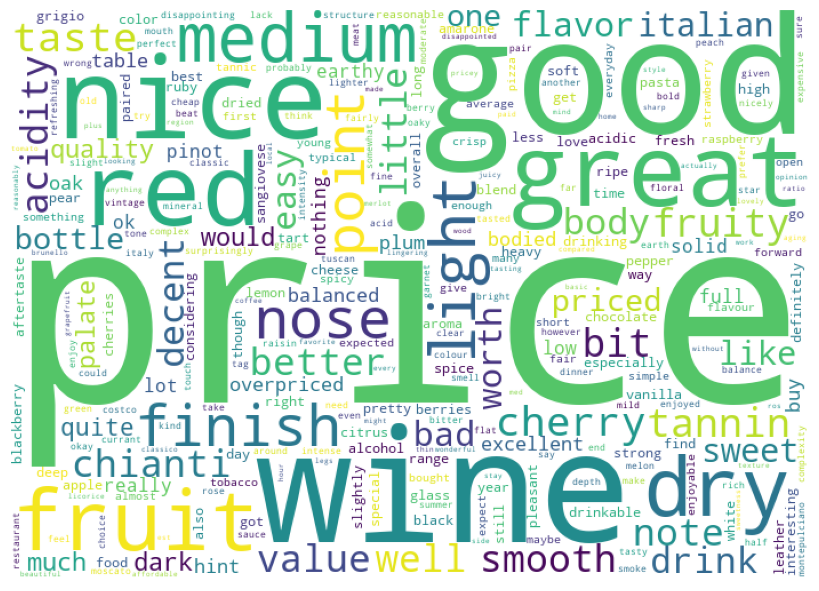

In [124]:
plot_wordcloud(X_test_it[X_test_it.Sentiment==-1].Cleaned)



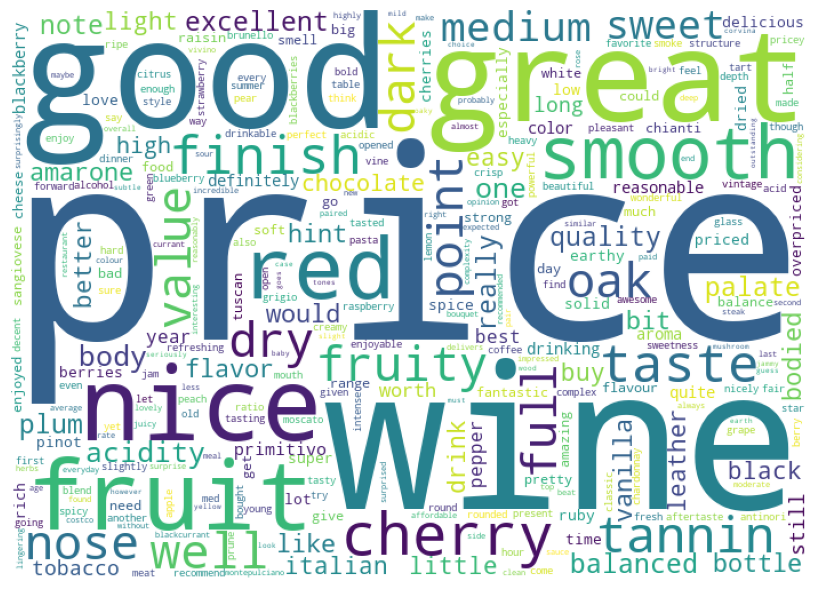

In [125]:
plot_wordcloud(X_test_it[X_test_it.Sentiment==0].Cleaned)

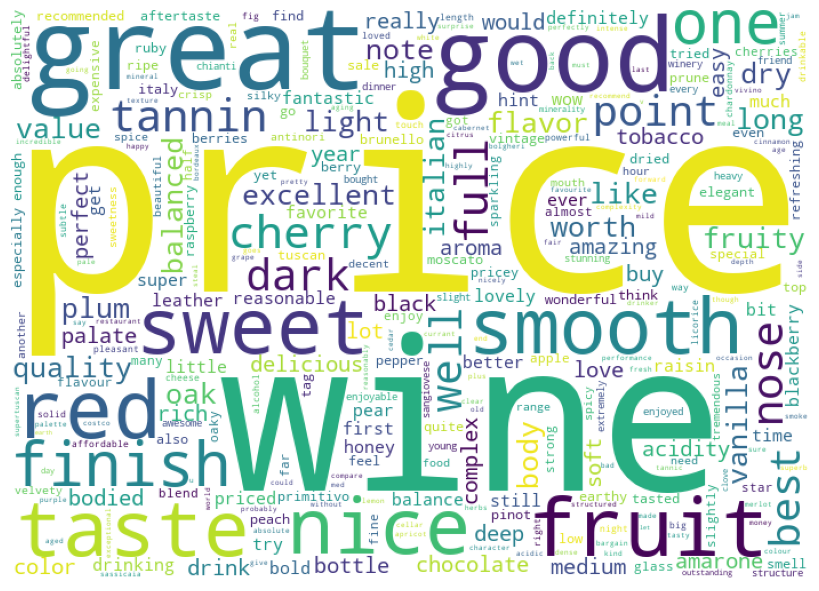

In [126]:
plot_wordcloud(X_test_it[X_test_it.Sentiment==1].Cleaned)

In [128]:
X_test_it.groupby(by="Sentiment").count()


,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,PriceNote
Sentiment,,,,,,,,,,,,,,,,
-1,953,945,953,953,953,953,953,953,953,953,953,953,953,953,953,953
0,820,807,820,820,820,820,820,820,820,820,818,820,820,820,820,820
1,529,516,529,529,529,529,529,529,529,529,528,529,529,529,529,529


In [130]:
X_test_it

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,Sentiment,int_Rating,PriceNote
321481,Montepulciano d'Abruzzo 2019,2019,93061,4.0,"Good value for the price. A well balance, not ...",2019-01-31T00:06:50.000Z,brandon.prosser,Masciarelli,3.8,italy,montepulciano-dabruzzo,9.967263,good value for the price a well balance not ov...,"[good, value, price, well, balance, overly, fr...",0,4,"[Good, value, price, A, well, balance, overly,..."
947967,Amarone della Valpolicella Classico 2018,2018,91908,5.0,"Bold, Complex, for the price.",2021-05-18T23:29:40.000Z,m9556de4cfb32f04fbac82d104748146,La Giaretta,4.5,italy,amarone-della-valpolicella-classico,38.901259,bold complex for the price,"[bold, complex, price, ]",1,5,"[Bold, Complex, price, ]"
148924,Collection Pinot Noir 2017,2017,1135821,3.5,Nice flavor for the price!,2014-02-06T02:10:55.000Z,jon-lod,Cavit,3.3,italy,province-of-pavia,17.949055,nice flavor for the price,"[nice, flavor, price, ]",-1,4,"[Nice, flavor, price, ]"
920033,60 Sessantanni Old Vines Primitivo di Manduria...,2017,11890,4.0,"Vanilla, chocolate and black fruit….divine and...",2022-04-10T05:24:33.000Z,m430f93829b945eef4d187d360d93f86,San Marzano,4.5,italy,primitivo-di-manduria,32.416053,vanilla chocolate and black fruit divine and a...,"[vanilla, chocolate, black, fruit, divine, gre...",0,4,"[Vanilla, chocolate, black, fruit, divine, gre..."
692535,Palazzo della Torre 2017,2017,8184,4.0,Black fruit on the nose. Strong taste of ciga...,2020-01-17T00:53:27.000Z,justinhering,Allegrini,4.1,italy,verona,17.949055,black fruit on the nose strong taste of cigar ...,"[black, fruit, nose, strong, taste, cigar, cho...",0,4,"[Black, fruit, nose, Strong, taste, cigar, cho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249364,Tignanello 2019,2019,1652,4.0,pricey in my country but fabulous,2014-05-18T03:10:33.000Z,amar-ko,Antinori,4.6,italy,tuscany,149.648623,pricey in my country but fabulous,"[pricey, country, fabulous]",0,4,"[pricey, country, fabulous]"
407737,Podere Montepulciano d'Abruzzo 2020,2020,1157163,4.0,Great wine at this price point. Found at Costco,2021-07-30T16:02:14.000Z,dharati.desai,Umani Ronchi,3.7,italy,montepulciano-dabruzzo,9.967263,great wine at this price point found at costco,"[great, wine, price, point, found, costco, ]",0,4,"[Great, wine, price, point, Found, Costco, ]"
1094357,Amarone della Valpolicella Classico 2019,2019,1122276,4.0,"3.875* Well balanced, full in most aspects, no...",2016-02-25T19:53:52.000Z,kristian-mn,Brunelli,4.4,italy,amarone-della-valpolicella-classico,36.905811,well balanced full in most aspects not vulgar...,"[, well, balanced, full, aspects, vulgar, way,...",0,4,"[3, 875, Well, balanced, full, aspects, vulgar..."
1246925,Tignanello 2019,2019,1652,4.5,Delicious and incredibly smooth. Worth the pri...,2020-11-22T05:12:58.000Z,bianca.walsh,Antinori,4.6,italy,tuscany,149.648623,delicious and incredibly smooth worth the pric...,"[delicious, incredibly, smooth, worth, price, ...",1,4,"[Delicious, incredibly, smooth, Worth, price, ..."
